In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import pickle

In [5]:
#input WGBS file from cancer tissue
file = '/Users/khandekara2/Documents/methylationProject/01_data/MALY_prevBase_TP53cds.tsv'
df = pd.read_csv(file, sep='\t')
locations = []
for chrom, start, stop in zip(list(df['chromosome']), list(df['start']), list(df['stop'])):
    locations.append((chrom, start, stop))
df['location'] = locations
grouped = df.groupby('location')
groupby = grouped.agg({'methylation_ratio': [np.mean, np.std], 'prev_base': 'max'})
groupby.reset_index(inplace=True)
groupby.columns = groupby.columns.droplevel(0)
# groupby.to_csv(file[:-4] + '.tsv', sep='\t')


In [12]:
df

,chromosome,start,stop,id,methylation_ratio,prev_base,location
0,chr17,7572972,7572973,4118819_GCB,0.91,G,"(chr17, 7572972, 7572973)"
1,chr17,7572972,7572973,4122131_GCB,0.94,G,"(chr17, 7572972, 7572973)"
2,chr17,7572972,7572973,4160735_GCB,0.92,G,"(chr17, 7572972, 7572973)"
3,chr17,7572972,7572973,4174884_GCB,0.96,G,"(chr17, 7572972, 7572973)"
4,chr17,7572972,7572973,tumor_4105105,0.95,G,"(chr17, 7572972, 7572973)"
5,chr17,7572972,7572973,tumor_4112512,1.00,G,"(chr17, 7572972, 7572973)"
6,chr17,7572972,7572973,tumor_4119027,0.93,G,"(chr17, 7572972, 7572973)"
7,chr17,7572972,7572973,tumor_4121361,0.88,G,"(chr17, 7572972, 7572973)"
8,chr17,7572972,7572973,tumor_4125240,0.90,G,"(chr17, 7572972, 7572973)"
9,chr17,7572972,7572973,tumor_4133511,0.86,G,"(chr17, 7572972, 7572973)"


In [6]:
y = groupby['mean'] #mean ratio from cancer
y_err = groupby['std'] #standard deviation from cancer samples
x = np.array([i for i in range(1, groupby.shape[0] + 1)]) # ticks for each CpG in coding region


In [7]:
x_labels = list(set([i[1] for i in df.location])) #coordinate of cytosine as labels
# x_labels = [i + 'CG' for i in groupby['max']]
# print (x_labels)
x_labels.sort()
# print (x_labels)


In [8]:
#input WGBS file from normal tissue
df2 = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/TP53_normal_cds_CpGs.tsv', sep='\t')
c = list(df2.start)
c = [i for i in c if i in x_labels]
c.sort() # now normal and cancer coordinates are matching
y2 = [] #methylation ratio from normal tissue 
for e in c:
    r = df2['methylation_ratio'].where(df2['start'] == e)
    # r is a series with all Nan's except for the value we want
    for a in r:
        if not np.isnan(a):
            y2.append(a)

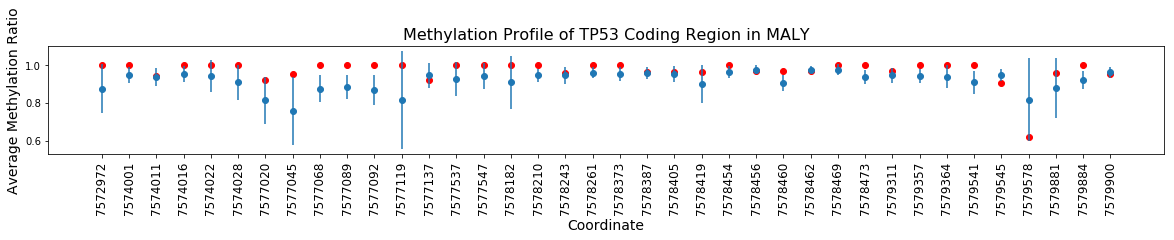

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation='vertical', fontsize=12)
ax.errorbar(x, y, yerr=y_err, fmt='o')
ax.set_xlabel('Coordinate', fontsize=14)
ax.set_ylabel('Average Methylation Ratio', fontsize=14)
ax.scatter(x, y2, color='red')
ax.set_title('Methylation Profile of TP53 Coding Region in MALY', fontsize=16)

In [13]:
#add mutated sites to profile
mutation_dict = pickle.load(open('/Users/khandekara2/Documents/methylationProject/01_data/MALY_mutation_dict.pickle', 'rb'))
mutations = [] #coordinate of mutated site
mut_ratios = []
for loc in zip(df.location.unique()):
    if loc in mutation_dict:
        mutations.append(loc)
        mut_ratio.append(0.0)
print (mutations)
print(mut_ratios)

[]
[]


In [ ]:
print (len(y2))
print (len(x))
print (x)
print (y2)

In [ ]:
df2

In [ ]:
print (len(y2))

In [ ]:

type(r)